In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm

import sklearn.metrics as metrics

In [2]:
df = pd.read_csv("football_players_dataset_traits_processed.csv", index_col=0)
df.head()

short_name                            full_name  age dateOfBirth  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   28  1993-01-07   
3       K. De Bruyne                      Kevin De Bruyne   29  1991-06-28   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height  weight           positions                 club  \
0     170      72  ['RW', 'ST', 'CF']         FC Barcelona   
1     188      83        ['ST', 'LW']             Juventus   
2     188      87              ['GK']      Atlético Madrid   
3     180      70       ['CM', 'CAM']      Manchester City   
4     175      68       ['LW', 'CAM']  Paris Saint-Germain   

   contract_valid_until  overall_rating  ...  CAM  CM  CDM LB  CB  RB  GK  \
0                  2021              93  ...    0   0    0  0   0   0   0   
1                  2022              92  ...    0   0    0  0   0   0   0   
2                  2023              91  ...    0   0    0  0   0   0   1   
3                  2023              91  ...    1   1    0  0   0   0   0   
4                  2022              91  ...    1   0    0  0   0   0   0   

  years_left_on_contract  att_work_rate  def_work_rate  
0                      0         Medium            Low  
1                      1           High            Low  
2                      2         Medium         Medium  
3                      2           High           High  
4                      1           High         Medium  

[5 rows x 66 columns]

In [3]:
df.columns.to_list()

['short_name',
 'full_name',
 'age',
 'dateOfBirth',
 'height',
 'weight',
 'positions',
 'club',
 'contract_valid_until',
 'overall_rating',
 'potential',
 'value',
 'wage',
 'prefered_foot',
 'weak_foot',
 'skill_moves',
 'rep_inter',
 'work_rate',
 'release_clause',
 'atk_crossing',
 'atk_finishing',
 'atk_heading_accuracy',
 'atk_short_passing',
 'atk_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'mvmt_acceleration',
 'mvmt_sprint_speed',
 'mvmt_agility',
 'mvmt_reactions',
 'mvmt_balance',
 'pow_shot_power',
 'pow_jumping',
 'pow_stamina',
 'pow_strength',
 'pow_long_shots',
 'ment_aggression',
 'ment_interceptions',
 'ment_positioning',
 'ment_vision',
 'ment_penalties',
 'ment_composure',
 'def_defensive_awareness',
 'def_standing_tackle',
 'def_sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positionning',
 'gk_reflexes',
 'ST',
 'LW',
 'RW',
 'CAM',
 'CM',
 'CDM',
 'LB',
 'CB',
 'RB',
 'GK'

In [4]:
df_dummies = pd.get_dummies(df[["prefered_foot", "att_work_rate", "def_work_rate"]])

In [5]:
df_dummies.head()

prefered_foot_Left  prefered_foot_Right  att_work_rate_High  \
0                   1                    0                   0   
1                   0                    1                   1   
2                   0                    1                   0   
3                   0                    1                   1   
4                   0                    1                   1   

   att_work_rate_Low  att_work_rate_Medium  def_work_rate_High  \
0                  0                     1                   0   
1                  0                     0                   0   
2                  0                     1                   0   
3                  0                     0                   1   
4                  0                     0                   0   

   def_work_rate_Low  def_work_rate_Medium  
0                  1                     0  
1                  1                     0  
2                  0                     1  
3                  0                     0  
4                  0                     1

In [6]:
df = df.join(df_dummies)

In [7]:
df.columns.to_list()

['short_name',
 'full_name',
 'age',
 'dateOfBirth',
 'height',
 'weight',
 'positions',
 'club',
 'contract_valid_until',
 'overall_rating',
 'potential',
 'value',
 'wage',
 'prefered_foot',
 'weak_foot',
 'skill_moves',
 'rep_inter',
 'work_rate',
 'release_clause',
 'atk_crossing',
 'atk_finishing',
 'atk_heading_accuracy',
 'atk_short_passing',
 'atk_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'mvmt_acceleration',
 'mvmt_sprint_speed',
 'mvmt_agility',
 'mvmt_reactions',
 'mvmt_balance',
 'pow_shot_power',
 'pow_jumping',
 'pow_stamina',
 'pow_strength',
 'pow_long_shots',
 'ment_aggression',
 'ment_interceptions',
 'ment_positioning',
 'ment_vision',
 'ment_penalties',
 'ment_composure',
 'def_defensive_awareness',
 'def_standing_tackle',
 'def_sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positionning',
 'gk_reflexes',
 'ST',
 'LW',
 'RW',
 'CAM',
 'CM',
 'CDM',
 'LB',
 'CB',
 'RB',
 'GK'

In [8]:
final_df = df.drop(columns=["short_name", "full_name", "dateOfBirth", "positions", "club", "contract_valid_until", "prefered_foot", "work_rate", "att_work_rate", "def_work_rate"])

In [9]:
final_df.columns.to_list()

['short_name',
 'age',
 'height',
 'weight',
 'overall_rating',
 'potential',
 'value',
 'wage',
 'weak_foot',
 'skill_moves',
 'rep_inter',
 'release_clause',
 'atk_crossing',
 'atk_finishing',
 'atk_heading_accuracy',
 'atk_short_passing',
 'atk_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'mvmt_acceleration',
 'mvmt_sprint_speed',
 'mvmt_agility',
 'mvmt_reactions',
 'mvmt_balance',
 'pow_shot_power',
 'pow_jumping',
 'pow_stamina',
 'pow_strength',
 'pow_long_shots',
 'ment_aggression',
 'ment_interceptions',
 'ment_positioning',
 'ment_vision',
 'ment_penalties',
 'ment_composure',
 'def_defensive_awareness',
 'def_standing_tackle',
 'def_sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positionning',
 'gk_reflexes',
 'ST',
 'LW',
 'RW',
 'CAM',
 'CM',
 'CDM',
 'LB',
 'CB',
 'RB',
 'GK',
 'years_left_on_contract',
 'prefered_foot_Left',
 'prefered_foot_Right',
 'att_work_rate_High',
 'att_work_

# Première prédiction

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [10]:
X = final_df.drop(columns=["value"])
y = final_df["value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
pipeline = Pipeline([('scaler', StandardScaler()), ('EN', lm.ElasticNet())])

pipeline.fit(X_train.drop(columns=["short_name"]), y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('EN', ElasticNet())])

In [13]:
y_pred = pipeline.predict(X_test.drop(columns=["short_name"]))

In [14]:
metrics.mean_squared_error(y_test, y_pred, squared=False)

2552704.1308124675

In [15]:
metrics.r2_score(y_test, y_pred)

0.8905081578773311

In [16]:
X_test.shape, y_test.shape, y_pred.shape

((6143, 64), (6143,), (6143,))

In [26]:
coefs = pipeline.named_steps['EN'].coef_

columns = X_train.drop(columns=["short_name"]).columns.to_list()

len(coefs), len(columns)

d = {'column': columns, 'coef': coefs}

coefficients = pd.DataFrame(data=d)
coefficients["abs_coef"] = abs(coefficients["coef"])
coefficients = coefficients.sort_values(by=['abs_coef'], ascending=False)
coefficients.head(60)

column          coef      abs_coef
9            release_clause  3.513495e+06  3.513495e+06
5                      wage  1.619049e+06  1.619049e+06
8                 rep_inter  5.832921e+05  5.832921e+05
4                 potential  4.402335e+05  4.402335e+05
3            overall_rating  3.692047e+05  3.692047e+05
0                       age -3.258837e+05  3.258837e+05
23           mvmt_reactions  2.593329e+05  2.593329e+05
54   years_left_on_contract  1.690295e+05  1.690295e+05
7               skill_moves  1.271922e+05  1.271922e+05
27              pow_stamina  9.975823e+04  9.975823e+04
21        mvmt_sprint_speed  9.590351e+04  9.590351e+04
53                       GK  9.007808e+04  9.007808e+04
33              ment_vision  8.733411e+04  8.733411e+04
35           ment_composure  8.680720e+04  8.680720e+04
34           ment_penalties -7.358533e+04  7.358533e+04
20        mvmt_acceleration  7.176867e+04  7.176867e+04
43              gk_reflexes  6.608205e+04  6.608205e+04
41               gk_kicking  6.076565e+04  6.076565e+04
13        atk_short_passing  5.940315e+04  5.940315e+04
40              gk_handling  5.792786e+04  5.792786e+04
39                gk_diving  5.241256e+04  5.241256e+04
42          gk_positionning  5.112406e+04  5.112406e+04
28             pow_strength  4.787391e+04  4.787391e+04
52                       RB -4.723619e+04  4.723619e+04
6                 weak_foot  4.321673e+04  4.321673e+04
30          ment_aggression -3.882408e+04  3.882408e+04
1                    height  3.873140e+04  3.873140e+04
24             mvmt_balance  3.739037e+04  3.739037e+04
29           pow_long_shots -3.487008e+04  3.487008e+04
11            atk_finishing  3.379893e+04  3.379893e+04
57       att_work_rate_High  3.224236e+04  3.224236e+04
46                       RW -3.170745e+04  3.170745e+04
49                      CDM -3.155917e+04  3.155917e+04
50                       LB -3.077312e+04  3.077312e+04
18       skill_long_passing  2.998333e+04  2.998333e+04
17        skill_fk_accuracy -2.878774e+04  2.878774e+04
59     att_work_rate_Medium -2.789745e+04  2.789745e+04
60       def_work_rate_High  2.716767e+04  2.716767e+04
48                       CM -2.709814e+04  2.709814e+04
36  def_defensive_awareness  2.552989e+04  2.552989e+04
19       skill_ball_control  2.463481e+04  2.463481e+04
51                       CB  2.392250e+04  2.392250e+04
45                       LW -2.048906e+04  2.048906e+04
15          skill_dribbling  1.877786e+04  1.877786e+04
61        def_work_rate_Low -1.673261e+04  1.673261e+04
37      def_standing_tackle  1.656516e+04  1.656516e+04
10             atk_crossing -1.552596e+04  1.552596e+04
32         ment_positioning  1.538385e+04  1.538385e+04
2                    weight  1.509727e+04  1.509727e+04
14              atk_volleys  1.340355e+04  1.340355e+04
62     def_work_rate_Medium -1.261349e+04  1.261349e+04
12     atk_heading_accuracy -1.045056e+04  1.045056e+04
26              pow_jumping -1.010934e+04  1.010934e+04
38       def_sliding_tackle  8.620938e+03  8.620938e+03
47                      CAM  8.443485e+03  8.443485e+03
16              skill_curve  7.965843e+03  7.965843e+03
22             mvmt_agility -6.677234e+03  6.677234e+03
58        att_work_rate_Low -6.203744e+03  6.203744e+03
25           pow_shot_power -5.465428e+03  5.465428e+03
31       ment_interceptions  5.035016e+03  5.035016e+03

In [18]:
final_df["predicted_value"] = pipeline.predict(final_df.drop(columns=["short_name", "value"]))

In [19]:
final_df.head(10)

short_name  age  height  weight  overall_rating  potential  \
0           L. Messi   33     170      72              93         93   
1  Cristiano Ronaldo   35     188      83              92         92   
2           J. Oblak   28     188      87              91         93   
3       K. De Bruyne   29     180      70              91         91   
4          Neymar Jr   28     175      68              91         91   
5     R. Lewandowski   32     183      80              91         91   
6          K. Mbappé   22     178      73              90         95   
7            Alisson   28     190      91              90         91   
8           M. Salah   28     175      71              90         90   
9            S. Mané   28     175      69              90         90   

         value      wage  weak_foot  skill_moves  ...  years_left_on_contract  \
0  103500000.0  560000.0          4            4  ...                       0   
1   63000000.0  220000.0          4            5  ...                       1   
2  120000000.0  125000.0          3            1  ...                       2   
3  127500000.0  370000.0          5            4  ...                       2   
4  132000000.0  270000.0          5            5  ...                       1   
5  111000000.0  240000.0          4            4  ...                       2   
6  185500000.0  160000.0          4            5  ...                       1   
7  102000000.0  160000.0          3            1  ...                       3   
8  120500000.0  250000.0          3            4  ...                       2   
9  120500000.0  250000.0          4            4  ...                       2   

   prefered_foot_Left  prefered_foot_Right  att_work_rate_High  \
0                   1                    0                   0   
1                   0                    1                   1   
2                   0                    1                   0   
3                   0                    1                   1   
4                   0                    1                   1   
5                   0                    1                   1   
6                   0                    1                   1   
7                   0                    1                   0   
8                   1                    0                   1   
9                   0                    1                   1   

   att_work_rate_Low  att_work_rate_Medium  def_work_rate_High  \
0                  0                     1                   0   
1                  0                     0                   0   
2                  0                     1                   0   
3                  0                     0                   1   
4                  0                     0                   0   
5                  0                     0                   0   
6                  0                     0                   0   
7                  0                     1                   0   
8                  0                     0                   0   
9                  0                     0                   0   

   def_work_rate_Low  def_work_rate_Medium  predicted_value  
0                  1                     0     1.091457e+08  
1                  1                     0     5.501306e+07  
2                  0                     1     7.960637e+07  
3                  0                     0     9.756020e+07  
4                  0                     1     9.262258e+07  
5                  0                     1     7.357057e+07  
6                  1                     0     1.072586e+08  
7                  0                     1     6.858448e+07  
8                  0                     1     8.247903e+07  
9                  0                     1     8.254771e+07  

[10 rows x 66 columns]

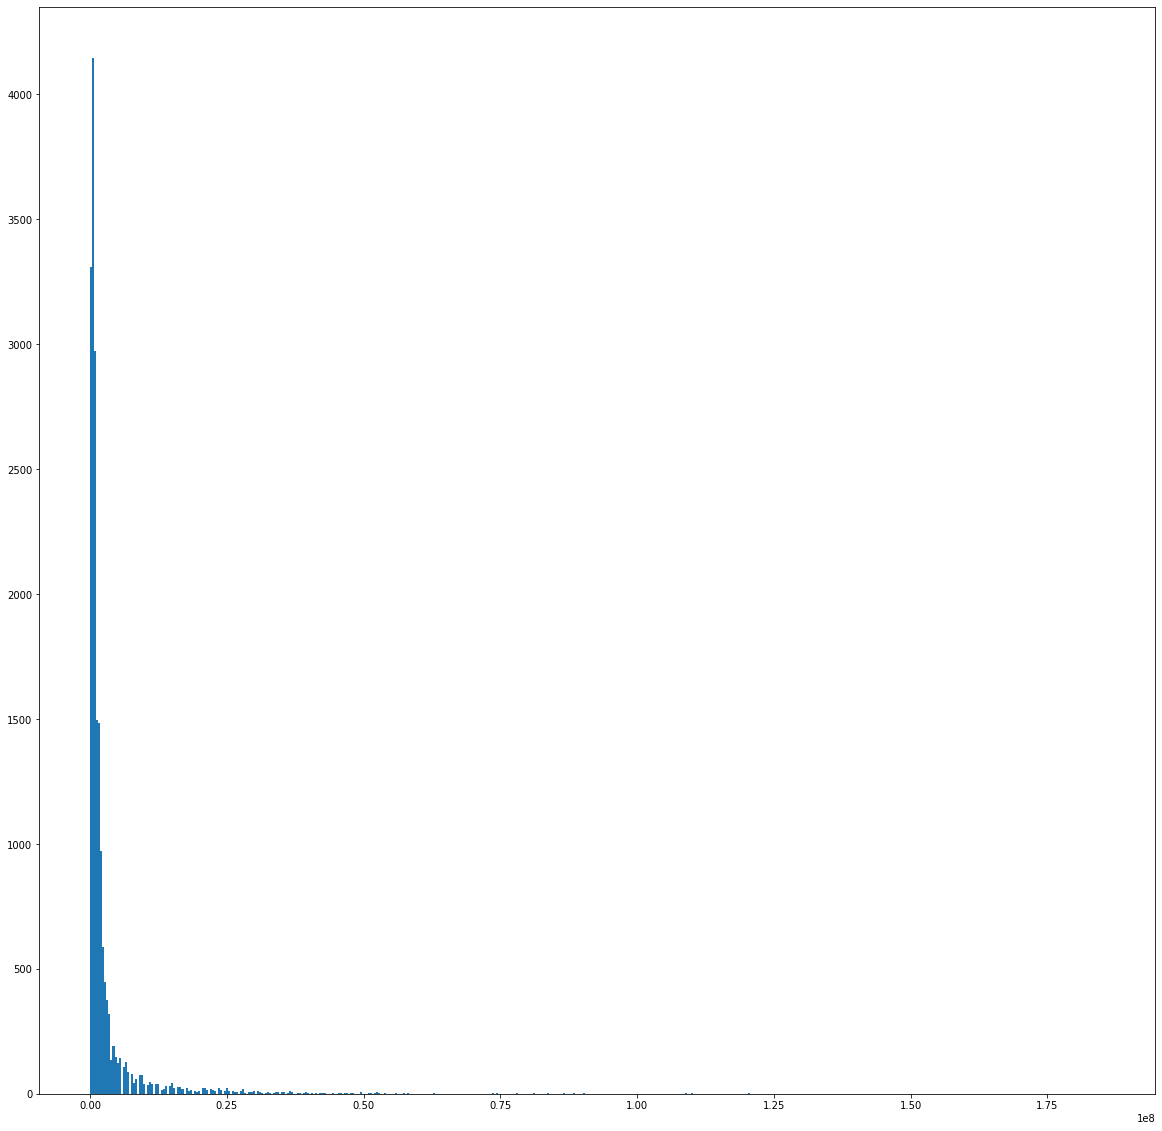

In [20]:
plt.figure(figsize=(20,20))
plt.hist(final_df["value"], bins=500)
plt.show()

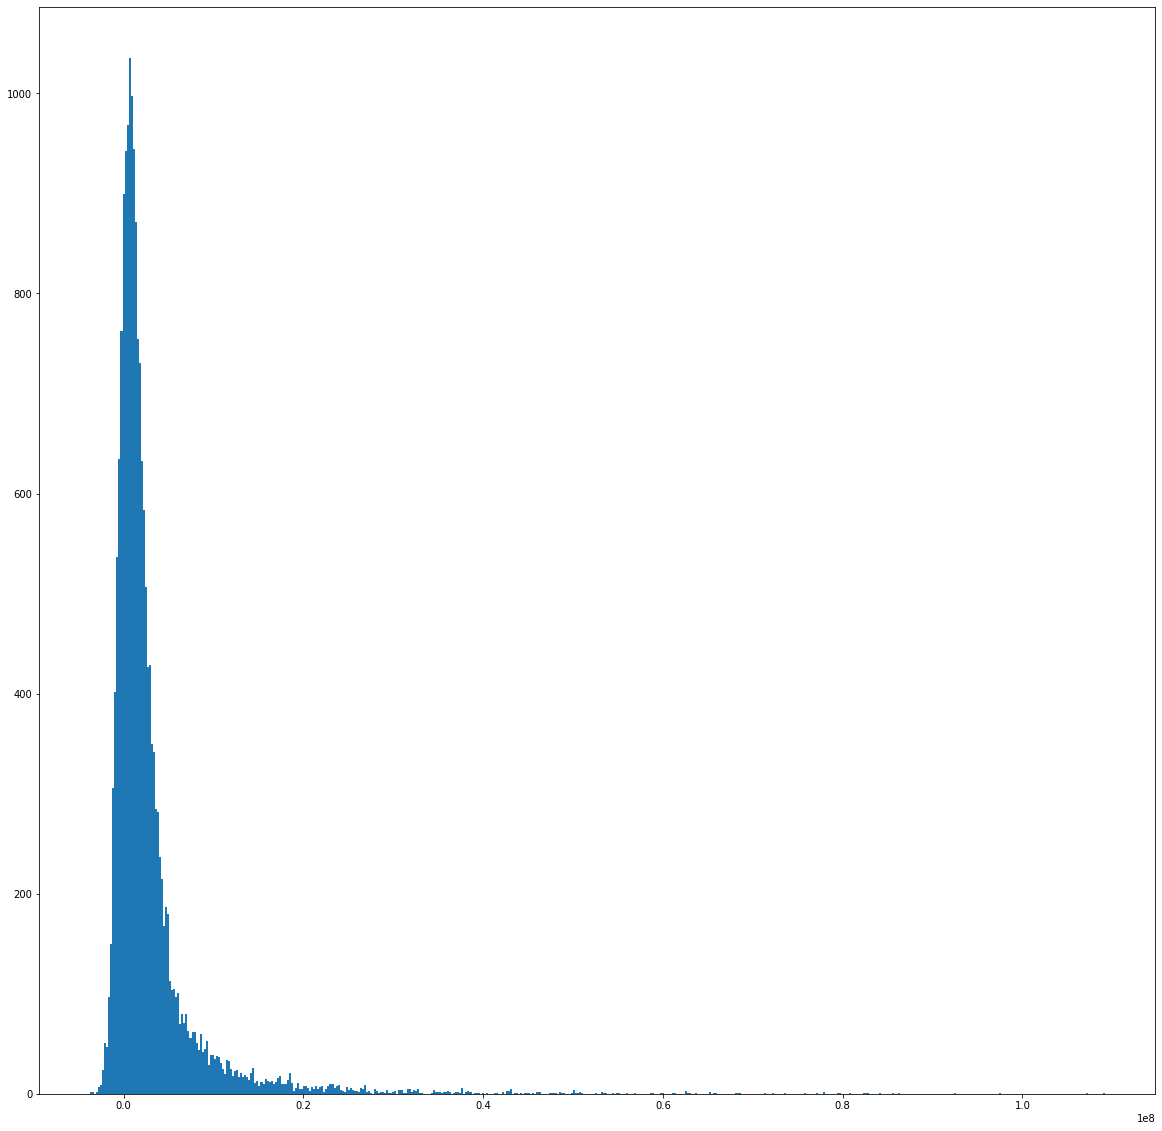

In [21]:
plt.figure(figsize=(20,20))
plt.hist(final_df["predicted_value"], bins=500)
plt.show()

In [22]:
pipeline.score(X_test.drop(columns=["short_name"]), y_test)

0.8905081578773311